In [1]:
import json
with open('../datas/bbc_preprocessed.json') as f:
    datas = json.load(f)

In [2]:
cate = [data['category'] for data in datas]
mp = {'Technology':0,'Entertainment & Arts':1,'Business':2,'Health':3,'Science & Environment':4}
cat = [mp[x] for x in cate]
cont = [' '.join(data['content']) for data in datas]

In [5]:
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

text_clf = Pipeline([('vect', CountVectorizer()),
                      ('tfidf', TfidfTransformer()),
                      ('clf', MultinomialNB()),
])

cv = ShuffleSplit(n_splits = 10, test_size = 0.5, random_state=5220)
cvs = cross_val_score(text_clf, cont, cat, cv=cv)
cvs

array([ 0.80719118,  0.80531195,  0.79867201,  0.8015535 ,  0.80781759,
        0.79979955,  0.80180406,  0.81182661,  0.80355801,  0.80756703])

In [7]:
np.mean(cvs)

0.80451014783262331

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(
    cont, cat, test_size = 0.5, random_state = 5220
)

text_clf.fit(x_train, y_train)
predicted = text_clf.predict(x_test)

cm = confusion_matrix(y_test, predicted)
cm

array([[2050,    4,  276,    0,    0],
       [  46, 1217,  171,    0,    0],
       [ 230,    8, 3032,    0,    0],
       [  66,    1,  304,   29,    0],
       [  87,    2,  344,    0,  115]], dtype=int64)

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidftransformer = TfidfTransformer()

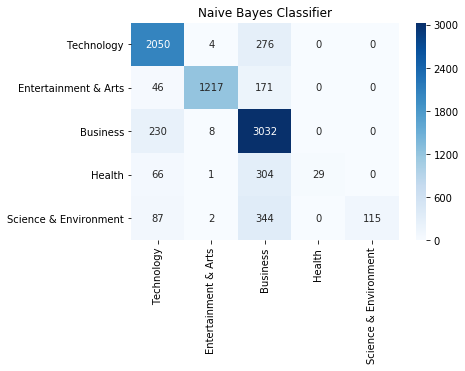

In [35]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

mp2 = ['Technology','Entertainment & Arts','Business','Health','Science & Environment']

confusion = pd.DataFrame(cm, index=mp2, columns=mp2)
plt.xlabel("Predicted")
plt.ylabel("Actual")
sn.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title("Naive Bayes Classifier")
plt.savefig("foo.jpg")
plt.show()

In [23]:
confusion

,Technology,Entertainment & Arts,Business,Health,Science & Environment
Technology,2050,4,276,0,0
Entertainment & Arts,46,1217,171,0,0
Business,230,8,3032,0,0
Health,66,1,304,29,0
Science & Environment,87,2,344,0,115


In [19]:
Counter(y_test)

Counter({0: 2330, 1: 1434, 2: 3270, 3: 400, 4: 548})